In [1]:
# modules
import numpy as np
import scipy as sp
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve


In [2]:
# read data
df = pd.read_csv('data_semi_train_clean.csv')
X = df.iloc[:,1:].values
Y = (df['Label']=='defect').values+1-1

In [3]:
X.shape

(11466, 303)

In [4]:
Y.sum()

739

In [5]:
# normalization (standardization)
from sklearn.preprocessing import StandardScaler
f = StandardScaler()
X = f.fit_transform(X)

In [6]:
X.var(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [7]:
# validation set
xtrain, xval, ytrain, yval = train_test_split(X,Y,test_size=0.2,random_state=0)

In [8]:
xtrain.shape

(9172, 303)

In [9]:
xval.shape

(2294, 303)

In [10]:

from sklearn.linear_model import LogisticRegression
f = LogisticRegression(max_iter=1000)
f.fit(xtrain,ytrain)

LogisticRegression(max_iter=1000)

In [11]:
f.intercept_

array([-13.54873551])

In [12]:
f.coef_


array([[-5.97926883e-02, -3.25895564e-01,  4.00530608e-01,
        -2.45711230e-01,  5.51815842e-01, -1.76279423e-01,
        -3.42095563e-01, -2.66232291e-01,  2.47873906e-01,
        -7.96267951e-01,  3.89920591e-01,  4.51486589e-01,
         6.10231421e-01,  9.57164798e-02, -6.01283919e-02,
         6.26582234e-01, -6.83261821e-01,  2.47882417e-01,
        -2.23491957e-01,  8.82875246e-01, -1.02434999e+00,
        -3.67399741e-01,  7.91900201e-01,  5.07639355e-01,
        -9.49997416e-01, -4.20068765e-01, -3.93446191e-01,
        -5.92210598e-01,  3.18713460e-02, -9.18564166e-02,
         6.10499146e-01,  5.21394923e-01, -7.56394530e-01,
         9.26793106e-01,  1.69109335e+00, -1.12760253e-02,
         9.18067769e-01,  2.12069582e+00,  4.05839529e-01,
         1.16977021e+00, -1.73698255e-01,  7.61259659e-02,
         8.33504778e-01, -9.47498565e-01,  1.02933011e+00,
        -1.02063883e+00,  8.36516794e-02, -6.52266202e-01,
         5.41812870e-01,  7.50338568e-02,  1.69312366e-0

In [13]:
yhat_train_prob = f.predict_proba(xtrain)
yhat_train = f.predict(xtrain)

In [14]:
yhat_train

array([0, 0, 0, ..., 0, 0, 0])

In [15]:
yhat_train_prob

array([[9.99996655e-01, 3.34461962e-06],
       [9.99899457e-01, 1.00542877e-04],
       [9.99948257e-01, 5.17433029e-05],
       ...,
       [1.00000000e+00, 4.48685952e-10],
       [9.99948514e-01, 5.14858652e-05],
       [9.99999272e-01, 7.27777602e-07]])

In [16]:
pd.crosstab(yhat_train,ytrain)

col_0,0,1
row_0,,
0,8578,15
1,3,576


In [17]:
(8578+576)/xtrain.shape[0]

0.9980375054513737

In [18]:
576/(576+15)

0.9746192893401016

In [19]:
576/(576+3)

0.9948186528497409

In [20]:
p,r,th = precision_recall_curve(ytrain,yhat_train_prob[:,1])

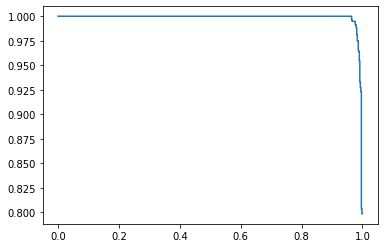

In [21]:
plt.plot(r,p)

In [22]:
yhat_val_prob = f.predict_proba(xval)
yhat_val = f.predict(xval)

In [23]:
pd.crosstab(yhat_val,yval)

col_0,0,1
row_0,,
0,2129,9
1,17,139


In [24]:
f.score(xval,yval)

0.988666085440279

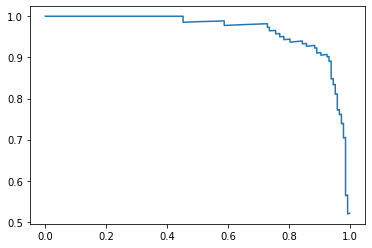

In [25]:
p,r,th = precision_recall_curve(yval,yhat_val_prob[:,1])
plt.plot(r,p)

In [26]:
r[p>0.99].max()


0.4527027027027027

In [27]:
?LogisticRegression

In [28]:

# my score function
def myscore(y,yhat_prob,min_r=0.95,th_f=None):
    p,r,th = precision_recall_curve(y,yhat_prob[:,1])
    if th_f == None:
        th_f = np.concatenate(([0],th))[r>min_r].max()
    yhat = (yhat_prob[:,1]>th_f)+1-1
    ct = pd.crosstab(yhat,y).values
    if ct.shape[0] == 1:
        m = np.array([0,0,ct[0][0],ct[0][1]])
    else:
        m = ct.reshape((4,))
    acc = (m[0]+m[3])/m.sum()
    precision = m[3]/(m[2]+m[3])
    recall = m[3]/(m[1]+m[3])
    return acc, precision, recall, m[0], m[1], m[2], m[3], th_f


In [29]:
myscore(yval,yhat_val_prob,min_r=0.99)

(0.9503051438535309,
 0.5653846153846154,
 0.9932432432432432,
 2033,
 1,
 113,
 147,
 0.006054643400459524)

In [30]:

# parameter tuning
C_list = 10**np.linspace(-5,5,num=51)


In [31]:
C_list

array([1.00000000e-05, 1.58489319e-05, 2.51188643e-05, 3.98107171e-05,
       6.30957344e-05, 1.00000000e-04, 1.58489319e-04, 2.51188643e-04,
       3.98107171e-04, 6.30957344e-04, 1.00000000e-03, 1.58489319e-03,
       2.51188643e-03, 3.98107171e-03, 6.30957344e-03, 1.00000000e-02,
       1.58489319e-02, 2.51188643e-02, 3.98107171e-02, 6.30957344e-02,
       1.00000000e-01, 1.58489319e-01, 2.51188643e-01, 3.98107171e-01,
       6.30957344e-01, 1.00000000e+00, 1.58489319e+00, 2.51188643e+00,
       3.98107171e+00, 6.30957344e+00, 1.00000000e+01, 1.58489319e+01,
       2.51188643e+01, 3.98107171e+01, 6.30957344e+01, 1.00000000e+02,
       1.58489319e+02, 2.51188643e+02, 3.98107171e+02, 6.30957344e+02,
       1.00000000e+03, 1.58489319e+03, 2.51188643e+03, 3.98107171e+03,
       6.30957344e+03, 1.00000000e+04, 1.58489319e+04, 2.51188643e+04,
       3.98107171e+04, 6.30957344e+04, 1.00000000e+05])

In [33]:
res = np.zeros( (len(C_list),3) )
for i in range(len(C_list)):
    f = LogisticRegression(C=C_list[i],max_iter=1000)
    f.fit(xtrain,ytrain)
    yhat_prob = f.predict_proba(xval)
    r = myscore(yval,yhat_prob)
    res[i,] = [i,C_list[i],r[1]]

In [34]:
res

array([[0.00000000e+00, 1.00000000e-05, 2.69083969e-01],
       [1.00000000e+00, 1.58489319e-05, 2.68571429e-01],
       [2.00000000e+00, 2.51188643e-05, 2.70633397e-01],
       [3.00000000e+00, 3.98107171e-05, 2.66540643e-01],
       [4.00000000e+00, 6.30957344e-05, 2.72200772e-01],
       [5.00000000e+00, 1.00000000e-04, 2.92531120e-01],
       [6.00000000e+00, 1.58489319e-04, 3.14732143e-01],
       [7.00000000e+00, 2.51188643e-04, 3.26388889e-01],
       [8.00000000e+00, 3.98107171e-04, 3.53383459e-01],
       [9.00000000e+00, 6.30957344e-04, 4.50479233e-01],
       [1.00000000e+01, 1.00000000e-03, 5.50781250e-01],
       [1.10000000e+01, 1.58489319e-03, 6.35135135e-01],
       [1.20000000e+01, 2.51188643e-03, 6.94581281e-01],
       [1.30000000e+01, 3.98107171e-03, 7.12121212e-01],
       [1.40000000e+01, 6.30957344e-03, 7.30569948e-01],
       [1.50000000e+01, 1.00000000e-02, 7.58064516e-01],
       [1.60000000e+01, 1.58489319e-02, 7.92134831e-01],
       [1.70000000e+01, 2.51188

In [35]:
pd.DataFrame(res)

,0,1,2
0,0.0,0.000010,0.269084
1,1.0,0.000016,0.268571
2,2.0,0.000025,0.270633
3,3.0,0.000040,0.266541
4,4.0,0.000063,0.272201
5,5.0,0.000100,0.292531
6,6.0,0.000158,0.314732
7,7.0,0.000251,0.326389
8,8.0,0.000398,0.353383
9,9.0,0.000631,0.450479


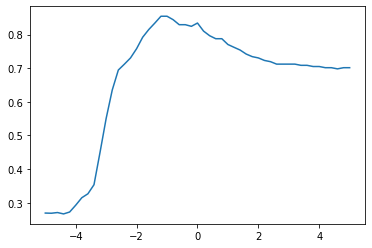

In [36]:
plt.plot(np.log10(res[:,1]),res[:,2])

In [37]:

f = LogisticRegression(max_iter=1000,C=0.1)
f.fit(xtrain,ytrain)
yhat_val_prob = f.predict_proba(xval)
myscore(yval,yhat_val_prob,min_r=0.95)

(0.9864864864864865,
 0.8545454545454545,
 0.9527027027027027,
 2122,
 7,
 24,
 141,
 0.26048751942584025)

In [38]:
yhat_train_prob = f.predict_proba(xtrain)
myscore(ytrain,yhat_train_prob,min_r=0.95)

(0.995529873528129,
 0.9790940766550522,
 0.9509306260575296,
 8569,
 29,
 12,
 562,
 0.43942088162324633)